In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import CleaningCars as cc

In [5]:
df=pd.read_csv("vehicles.csv")

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','url', 'region_url', 'image_url', 'VIN', 'id'],axis=1,inplace=True)

In [8]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   year          457163 non-null  float64
 3   manufacturer  439993 non-null  object 
 4   model         453367 non-null  object 
 5   condition     265273 non-null  object 
 6   cylinders     287073 non-null  object 
 7   fuel          454976 non-null  object 
 8   odometer      402910 non-null  float64
 9   title_status  455636 non-null  object 
 10  transmission  455771 non-null  object 
 11  drive         324025 non-null  object 
 12  size          136865 non-null  object 
 13  type          345475 non-null  object 
 14  paint_color   317370 non-null  object 
 15  description   458143 non-null  object 
 16  state         458213 non-null  object 
 17  lat           450765 non-null  float64
 18  long

In [10]:
df[df['price']>10**6][["manufacturer","model",'price']]

,manufacturer,model,price
1622,chevrolet,NaN,1234567890
21955,chevrolet,NaN,1234567
25413,nissan,pathfinder,11111111
38375,gmc,NaN,2808348671
107009,mercedes-benz,benz e350,9999999
109428,jeep,wrangler unlimited,3429900
109654,NaN,Mopar,11111111
117008,chevrolet,nova,1234567
145053,jeep,wrangler,12345679
151283,jeep,wrangler,1234567


# Prices cleaning

C:\Users\gerasimos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gerasimos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gerasimos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, 'Prices < 100k')

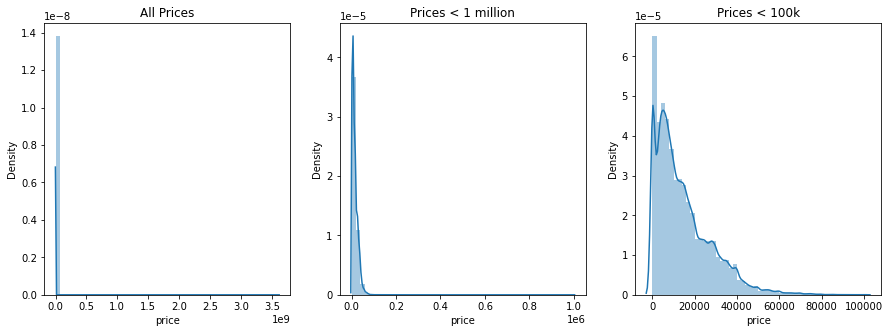

In [11]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['price'],ax=ax[0])
ax[0].set_title("All Prices")

sns.distplot(df[df['price']<10**6]['price'],ax=ax[1])
ax[1].set_title("Prices < 1 million")

sns.distplot(df[df['price']<10**5]['price'],ax=ax[2])
ax[2].set_title("Prices < 100k")

In [12]:
df[(df['price']>50) & (df['price']<200)]
#There are duplicates see the first three
#All prices that are so small look unreal new cars with price 100

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
670,birmingham,199,2017.0,dodge,charger,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2017 Dodge Charger 21737 miles. 1 owner and Cl...,al,33.481600,-86.859000,2020-11-24T13:44:33-0600
1172,birmingham,199,2017.0,dodge,charger,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2017 Dodge Charger 21737 miles. 1 owner and Cl...,al,33.481600,-86.859000,2020-11-18T14:03:23-0600
1491,birmingham,199,2017.0,dodge,charger,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2017 Dodge Charger 21737 miles. 1 owner and Cl...,al,33.481600,-86.859000,2020-11-13T13:49:32-0600
1764,birmingham,199,2017.0,dodge,charger,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2017 Dodge Charger 21737 miles. 1 owner and Cl...,al,33.481600,-86.859000,2020-11-09T14:29:09-0600
4455,mobile,199,2017.0,dodge,charger,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2017 Dodge Charger 20120 miles. 1 owner and cl...,al,30.730900,-88.078900,2020-11-24T13:43:01-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457399,vermont,99,2017.0,volkswagen,tiguan,NaN,NaN,gas,54040.0,clean,automatic,4wd,full-size,NaN,white,Vehicle DescriptionNavigation System|8 Speaker...,vt,43.244000,-71.410500,2020-12-03T10:52:13-0500
457401,vermont,99,2017.0,jeep,cherokee,NaN,NaN,other,48413.0,clean,automatic,4wd,full-size,NaN,white,Vehicle Description6 Speakers|AM/FM radio: Sir...,vt,43.244000,-71.410500,2020-12-03T10:26:14-0500
457405,vermont,99,2019.0,chevrolet,silverado 2500hd,NaN,NaN,diesel,55990.0,clean,automatic,4wd,full-size,NaN,white,Vehicle DescriptionStandard Suspension Package...,vt,43.244000,-71.410500,2020-12-03T10:00:23-0500
457406,vermont,99,2019.0,chevrolet,silverado 2500hd,NaN,NaN,diesel,55990.0,clean,automatic,4wd,full-size,NaN,white,Vehicle DescriptionStandard Suspension Package...,vt,43.244000,-71.410500,2020-12-03T10:00:23-0500


In [13]:
df[(df['price']>200) & (df['price']<1000)]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
9,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,clean,automatic,NaN,NaN,van,NaN,2019 Ford Transit Connect Wagon XLT FOR ONLY $...,al,36.967357,-122.024254,2020-11-27T12:42:28-0600
167,birmingham,800,1976.0,chevrolet,nova,NaN,6 cylinders,gas,123000.0,missing,automatic,rwd,full-size,sedan,yellow,1976 Chevrolet Nova 250 six cylinder automatic...,al,33.171700,-86.271300,2020-12-01T15:42:05-0600
275,birmingham,500,2020.0,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,NaN,clean,other,NaN,full-size,bus,green,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WIT...,al,32.922900,-86.545000,2020-11-30T11:13:24-0600
313,birmingham,500,2017.0,NaN,Coleman Kt 196,like new,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,I have a Coleman Kt 196 go kart forsale. Go Ka...,al,33.381300,-86.704600,2020-11-29T14:15:33-0600
487,birmingham,500,1997.0,jeep,grand cherokee,salvage,6 cylinders,gas,130000.0,clean,automatic,4wd,NaN,NaN,white,1997 Jeep Grand Cherokee. Old hunting rig has...,al,33.603500,-86.466800,2020-11-26T09:21:11-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457741,seattle-tacoma,800,1987.0,volkswagen,jetta,good,4 cylinders,gas,186000.0,clean,manual,fwd,NaN,sedan,white,"This is a project. Cons: ""Non running"" It s...",wa,48.140180,-122.257061,2020-12-03T06:33:46-0800
457842,spokane / coeur d'alene,270,2016.0,nissan,370z touring,NaN,NaN,gas,43474.0,clean,automatic,rwd,NaN,coupe,NaN,CAL Cars STOCK #: 43046 C...,wa,47.643008,-117.562263,2020-12-03T08:31:48-0800
457930,appleton-oshkosh-FDL,800,2000.0,ford,contour,good,4 cylinders,gas,76000.0,clean,automatic,fwd,NaN,NaN,NaN,"2000 ford contour, 76,000 miles runs and drive...",wi,44.295600,-88.271700,2020-12-03T07:36:38-0600
458118,madison,400,1977.0,NaN,MG Midget,fair,4 cylinders,gas,49000.0,missing,manual,rwd,compact,convertible,blue,1977 MG Midget with MG B engine. Stored in bar...,wi,43.065383,-89.855051,2020-12-03T06:58:33-0600


In [14]:
#cars worth more than 1 million (prices seem unreasonable)
df[df['price']>10**6][["manufacturer","model",'price']]

,manufacturer,model,price
1622,chevrolet,NaN,1234567890
21955,chevrolet,NaN,1234567
25413,nissan,pathfinder,11111111
38375,gmc,NaN,2808348671
107009,mercedes-benz,benz e350,9999999
109428,jeep,wrangler unlimited,3429900
109654,NaN,Mopar,11111111
117008,chevrolet,nova,1234567
145053,jeep,wrangler,12345679
151283,jeep,wrangler,1234567


#prices less than 100
#prices more than 1 million
#prices like 123456789
mean_of_normal_prices=df.drop(df[(df['price']<=10**2) | 
                                 (df['price']>10**6) | 
                                 (df["price"].isin([123,1234,12345,123456,123456]))].index)["price"].mean()

#set the price of unusual prices to the mean of normal prices
df.loc[(df['price']<10**2) | 
       (df['price']>10**6) | 
       (df["price"].isin([123,1234,12345,123456,123456])),'price']=mean_of_normal_prices

df['price'].mean()

In [15]:
df=cc.price_range(df,lower=200)

# Paint Color

In [16]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


Text(0.5, 1.0, 'Average prices per color category')

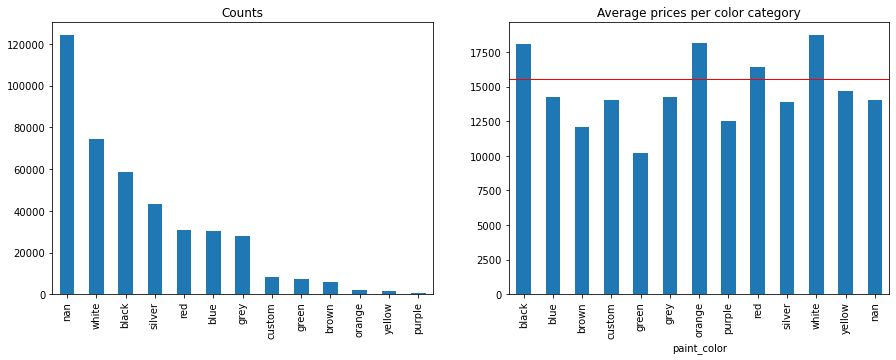

In [17]:
fig,ax=plt.subplots(1,2, figsize=(15,5))

df['paint_color'].value_counts(dropna=False).plot(kind='bar',ax=ax[0])
ax[0].set_title("Counts")

df.groupby('paint_color',dropna=False).mean()['price'].plot(kind='bar',ax=ax[1])
plt.axhline(y=df['price'].mean(),linewidth=1, color='red', label="average price")
ax[1].set_title("Average prices per color category")


In [18]:
df["paint_color"]=df["paint_color"].apply(lambda x: x if x in ['white','black','silver'] else "other")

Text(0.5, 1.0, 'Average prices per color category')

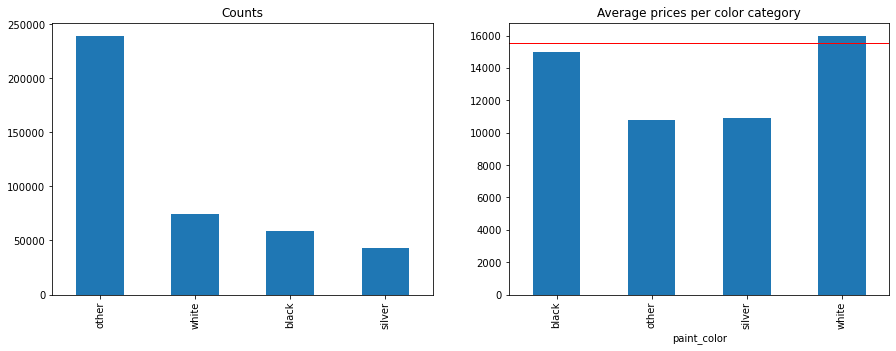

In [19]:
fig,ax=plt.subplots(1,2, figsize=(15,5))

df['paint_color'].value_counts(dropna=False).plot(kind='bar',ax=ax[0])
ax[0].set_title("Counts")

df.groupby('paint_color',dropna=False).median()['price'].plot(kind='bar',ax=ax[1])
plt.axhline(y=df['price'].mean(),linewidth=1, color='red')
ax[1].set_title("Average prices per color category")


In [20]:
"""def clean_color(df, color_list=['white','black','silver']):

    #groups all the colors that are not in the list as "other"
    #one hot encoding of paint_color column
    
    df["paint_color"]=df["paint_color"].apply(lambda x: x if x in color_list else "other")
    df=pd.get_dummies(df, prefix="color",columns=['paint_color'])
    df.drop('color_other',axis=1,inplace=True)
    
    return df"""

'def clean_color(df, color_list=[\'white\',\'black\',\'silver\']):\n\n    #groups all the colors that are not in the list as "other"\n    #one hot encoding of paint_color column\n    \n    df["paint_color"]=df["paint_color"].apply(lambda x: x if x in color_list else "other")\n    df=pd.get_dummies(df, prefix="color",columns=[\'paint_color\'])\n    df.drop(\'color_other\',axis=1,inplace=True)\n    \n    return df'

# Drive

Text(0.5, 1.0, 'Average prices per drive type')

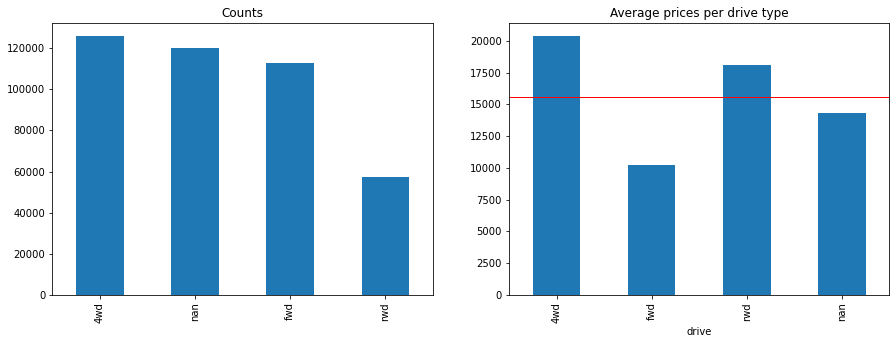

In [21]:
fig,ax=plt.subplots(1,2, figsize=(15,5))

df['drive'].value_counts(dropna=False).plot(kind='bar',ax=ax[0])
ax[0].set_title("Counts")

df.groupby('drive',dropna=False).mean()['price'].plot(kind='bar',ax=ax[1])
plt.axhline(y=df['price'].mean(),linewidth=1, color='red')
ax[1].set_title("Average prices per drive type")


Text(0.5, 1.0, 'Offroads')

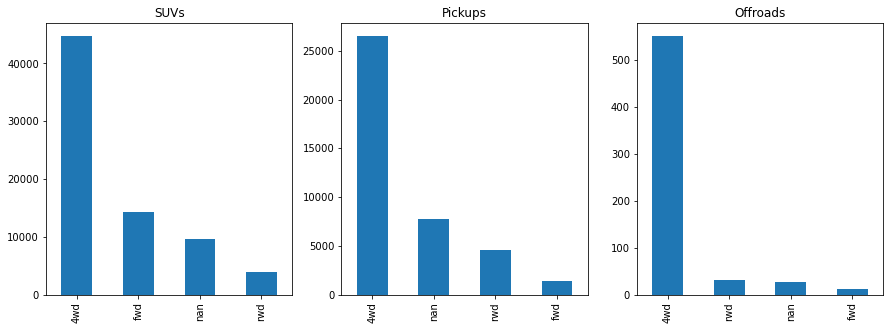

In [22]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

#maybe we can determine the drive from the type of car e.g SUV --> 4wd or awd
df[df['type']=="SUV"]["drive"].value_counts(dropna=False).plot(kind='bar',ax=ax[0])
ax[0].set_title('SUVs')

#same with pickups and offroads
df[df['type']=="pickup"]["drive"].value_counts(dropna=False).plot(kind='bar',ax=ax[1])
ax[1].set_title('Pickups')

df[df['type']=="offroad"]["drive"].value_counts(dropna=False).plot(kind='bar',ax=ax[2])
ax[2].set_title('Offroads')
#most suv are 4wd more than 3/4 so maybe

In [ ]:
"""def drive_clean(df):
    
    #Assign 4wd to all SUVs, pickups and offroads with nan drive type 
    df.loc[(((df["type"]=="SUV") | 
            (df["type"]=="pickup") | 
            (df["type"]=="offroad")) & (df['drive'].isnull()==True)),"drive"] = "4wd"
    
    #assign "other" to all nan values
    #df.loc[(df['drive'].isnull()==True),"drive"]="other"

    #one hot encoding 4wd, rwd, fwd, other
    df = pd.get_dummies(df,prefix="drive",columns=['drive'])
    
    return df    """

# Transmission

Text(0.5, 1.0, 'Average prices per drive type')

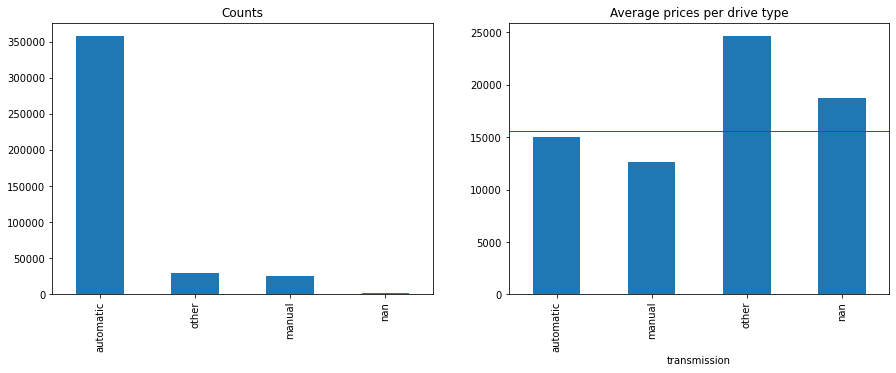

In [23]:
fig,ax=plt.subplots(1,2, figsize=(15,5))

df['transmission'].value_counts(dropna=False).plot(kind='bar',ax=ax[0])
ax[0].set_title("Counts")

df.groupby('transmission',dropna=False).mean()['price'].plot(kind='bar',ax=ax[1])
plt.axhline(y=df['price'].mean(),linewidth=1, color='red')
ax[1].set_title("Average prices per drive type")


In [ ]:
"""def transmission_clean(df):
    
    #Groups nan values with "other" type of transmission
    df.loc[(df['transmission'].isnull()==True),"transmission"]="other"
    
    #one hot encoding manual, automatic and other
    df = pd.get_dummies(df,prefix="transmission",columns=['transmission'])
    
    return df"""